<a href="https://colab.research.google.com/github/ilham-mukti/Machine-Learning/blob/main/EDA/Latihan_EDA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
sns.set_style("darkgrid")

In [73]:
datas = pd.read_csv("https://raw.githubusercontent.com/ilham-mukti/Machine-Learning/main/clustering/dataset/Mall_Customers.csv")
datas.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
datas.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

# Age

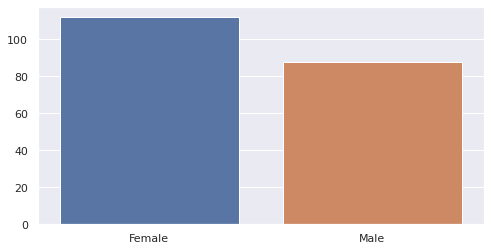

In [75]:
genders = datas.Gender.value_counts()
plt.figure(figsize=(8,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

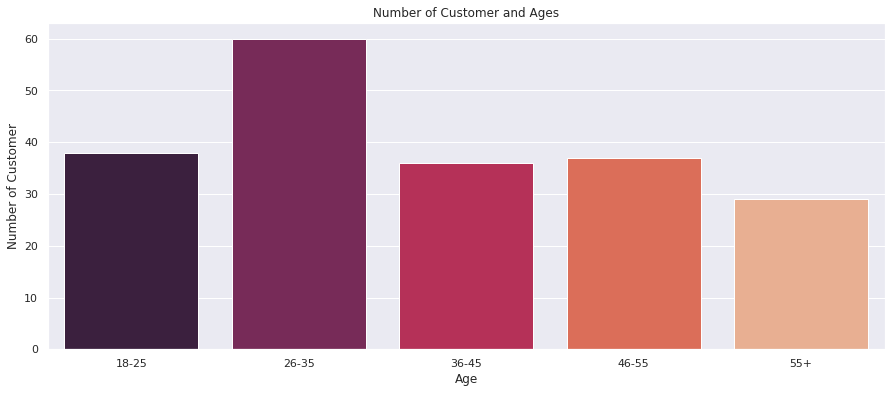

In [76]:
age18_25 = datas.Age[(datas.Age <= 25) & (datas.Age >= 18)]
age26_35 = datas.Age[(datas.Age <= 35) & (datas.Age >= 26)]
age36_45 = datas.Age[(datas.Age <= 45) & (datas.Age >= 36)]
age46_55 = datas.Age[(datas.Age <= 55) & (datas.Age >= 46)]
age55above = datas.Age[datas.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

# Annual Income

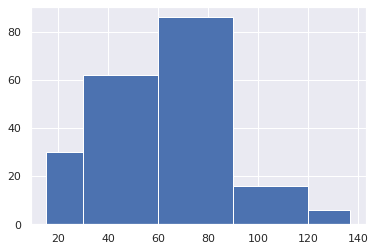

In [77]:
plt.hist(datas['Annual Income (k$)'], bins=[datas['Annual Income (k$)'].min(), 30, 60, 90, 120, datas['Annual Income (k$)'].max()]);

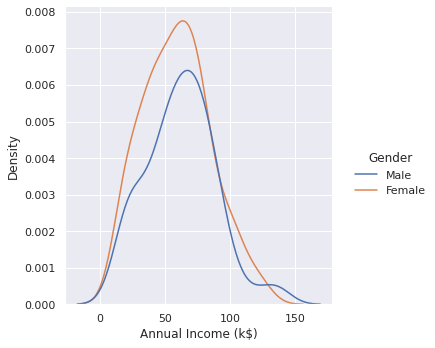

In [79]:
sns.displot(data=datas, x="Annual Income (k$)", hue='Gender', kind='kde')

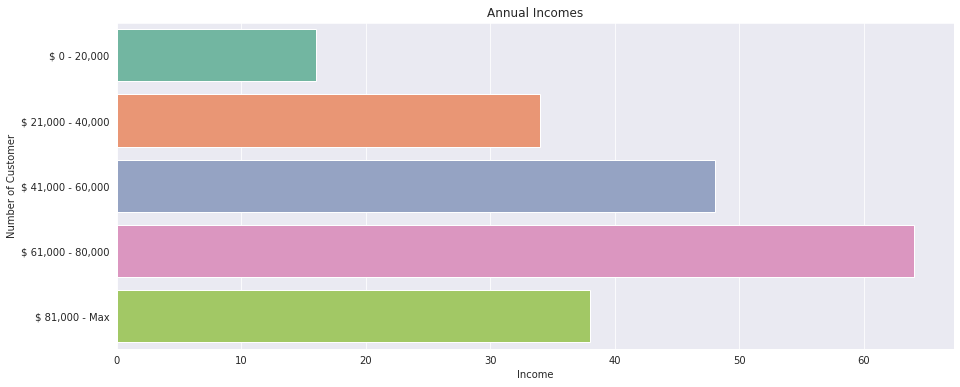

In [ ]:
income = datas['Annual Income (k$)']

income0_20 = income[(income <= 20) & (income >= 0)]
income21_40 = income[(income <= 40) & (income >= 21)]
income41_60 = income[(income <= 60) & (income >= 41)]
income61_80 = income[(income <= 80) & (income >= 61)]
income81_max = income[(income <= income.max()) & (income >= 81)]

x_income = ['$ 0 - 20,000', '$ 21,000 - 40,000', '$ 41,000 - 60,000', '$ 61,000 - 80,000', '$ 81,000 - Max']
y_income = [len(income0_20.values), len(income21_40.values), len(income41_60.values), len(income61_80.values), len(income81_max.values)]

plt.figure(figsize=(15, 6))
sns.barplot(x=y_income, y=x_income, palette='Set2')
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer");

# Spending Scores

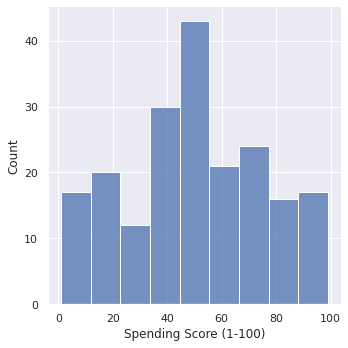

In [85]:
sns.displot(data=datas, x="Spending Score (1-100)",  kind='hist')

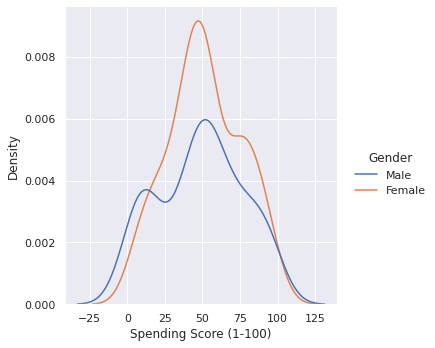

In [88]:
sns.displot(data=datas, x="Spending Score (1-100)", hue='Gender', kind='kde')

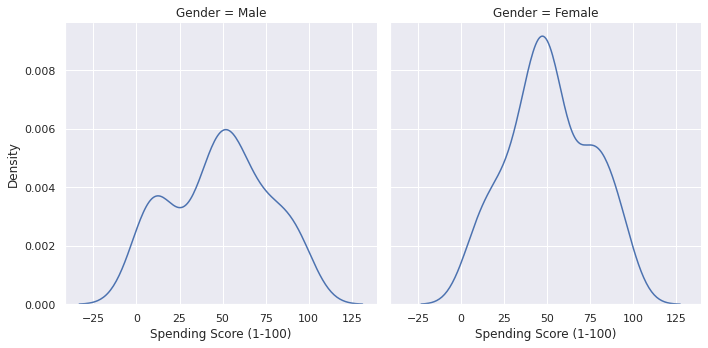

In [89]:
sns.displot(data=datas, x="Spending Score (1-100)", col='Gender', kind='kde')

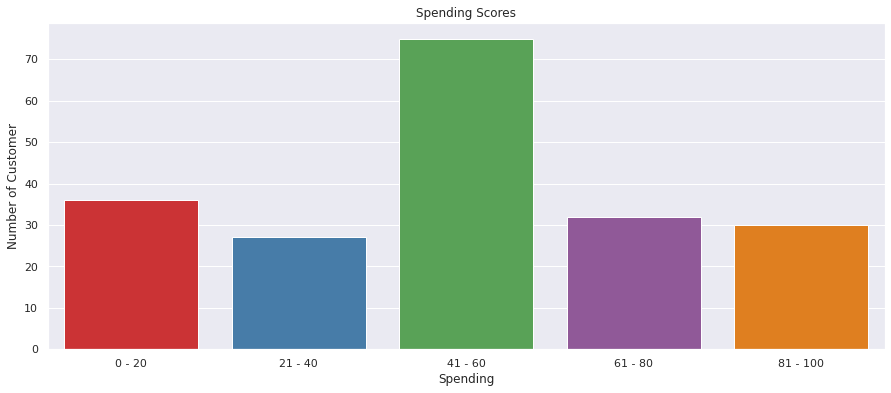

In [91]:
spending = datas['Spending Score (1-100)']
spending0_20 = spending[(spending <= 20) & (spending >= 0)]
spending21_40 = spending[(spending <= 40) & (spending >= 21)]
spending41_60 = spending[(spending <= 60) & (spending >= 41)]
spending61_80 = spending[(spending <= 80) & (spending >= 61)]
spending81_100 = spending[(spending <= 100) & (spending >= 81)]

x = ['0 - 20', '21 - 40', '41 - 60', '61 - 80', '81 - 100']
y = [len(spending0_20.values), len(spending21_40.values), len(spending41_60.values), len(spending61_80.values), len(spending81_100.values)]

plt.figure(figsize=(15, 6))
sns.barplot(x=x, y=y, palette='Set1')
plt.title("Spending Scores")
plt.xlabel("Spending")
plt.ylabel("Number of Customer")
plt.show();

In [92]:
X = datas[['Age', 'Annual Income (k$)','Spending Score (1-100)']]
score = []

for k in range(1,11):
  model = KMeans(n_clusters=k, init='k-means++', n_init=50)
  label = model.fit_predict(X)
  score.append(model.inertia_)

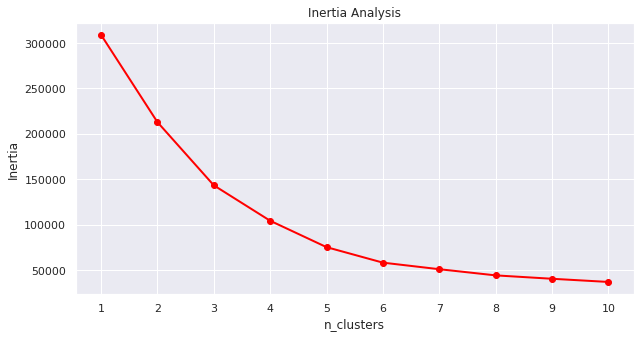

In [93]:
plt.figure(figsize=(10, 5))
plt.plot(range(1,11), score, linewidth=2, marker='o', color='red')
plt.xticks(range(1,11))
plt.title("Inertia Analysis")
plt.xlabel("n_clusters")
plt.ylabel("Inertia");

# Banding2in

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

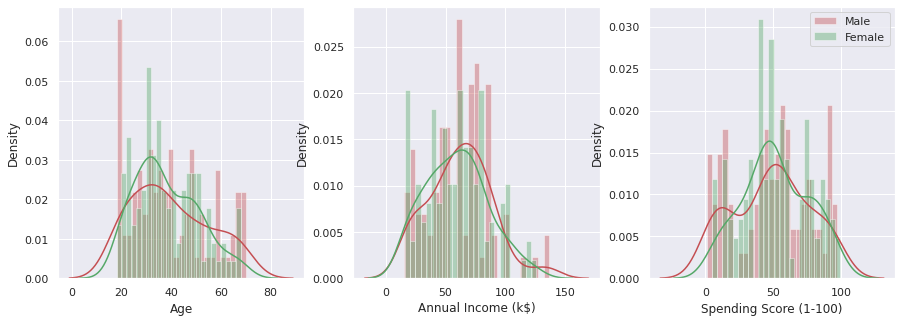

In [109]:
num_var = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for num, ax in zip(num_var, axes.flatten()):
  sns.distplot(datas[num][datas.Gender == 'Male'], bins=25, color='r', label='Male', ax=ax)
  sns.distplot(datas[num][datas.Gender == 'Female'], bins=25, color='g', label='Female', ax=ax)
plt.legend();